## Loading requirements

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from datasets import load_dataset
ds = load_dataset("microsoft/cats_vs_dogs",split="train")

## Pre-processing

In [4]:
from PIL import Image, ImageOps

In [5]:
def preprocessing(example):
    import numpy as np
    size = (64,64)
    img = example['image']
    img = img.convert('RGB')
    img_resized = img.resize(size)
    img_processed = np.array(img_resized, dtype=np.float32)/255
    img_flatten = img_processed.flatten()
    example['image'] = img_flatten
    return example

images = ds.map(preprocessing, num_proc=4)['image']
labels = ds['labels']


In [6]:
import numpy as np

In [16]:
m = 15000
vector_images = np.array(images[:m]).squeeze()

## Configuration of the NN and the tensors

In [17]:
tensor_images = torch.tensor(vector_images, dtype= torch.float32)


In [18]:
tensor_images.shape

torch.Size([15000, 12288])

In [19]:
tensor_labels = torch.tensor(labels[:m],dtype=torch.float32)

In [20]:
model = nn.Sequential(nn.Linear(12288,10),nn.ReLU(),nn.Linear(10,9),nn.ReLU(),nn.Linear(9,1),nn.Sigmoid())
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr = .001)

In [21]:
loss_evolution = []
iteration = 100
for epoch in range(iteration):
    optimizer.zero_grad()
    outputs = model(tensor_images)
    loss = loss_function(outputs,tensor_labels)
    loss.backward()
    optimizer.step()
    loss_evolution.append(loss.item()) #très important car sinon fait crash lol

c:\Users\evill\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:634: UserWarning: Using a target size (torch.Size([15000])) that is different to the input size (torch.Size([15000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


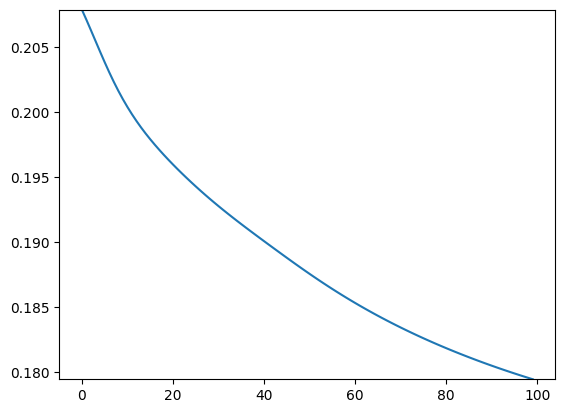

In [ ]:
import matplotlib.pyplot as plt
y = loss_evolution
x = [i for i in range(iteration)]
plt.plot(x,y)
plt.ylim(min(loss_evolution),max(loss_evolution))
plt.show()